In [28]:
from utils import *
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
df_original = pd.read_csv("M.csv") \
                .pipe(clean_data) 

In [30]:
def line_data(df, movement_function):
    return df  \
        .pipe(movement_function) \
        .assign(MaxDate = lambda df: pd.to_datetime((df.Date.max() - datetime.timedelta(days=0)).date()),
                MinDate = lambda df: pd.to_datetime((df.Date.min() - datetime.timedelta(days=0)).date())) \
        .query("Date.between(MinDate, MaxDate)") \
        .assign(Month = lambda dataset: dataset.Date.map(lambda value: value.replace(day = 1))) \
        .groupby(["Month", "Tipo", "Categoria", "Subcategoria", "Beneficiario"], as_index = False).Importe.sum() \
        .assign(Importe = lambda df: df.Importe.abs())

In [31]:
df = line_data(df_original, return_hogar_movements)

In [32]:
df

,Month,Tipo,Categoria,Subcategoria,Beneficiario,Importe
0,2022-01-01,Gastos,Cultura,Cine,RENOIR,26.00
1,2022-01-01,Gastos,Cultura,Libros,AMAZON,9.93
2,2022-01-01,Gastos,Cultura,Libros,FABULA,18.91
3,2022-01-01,Gastos,Extras,Ajustes,No Definido,17.13
4,2022-01-01,Gastos,Extras,Casa,BRICOMART,0.70
...,...,...,...,...,...,...
819,2022-11-01,Gastos,Supervivencia,Farmacia,FARMACIA ALCORCON,9.00
820,2022-11-01,Gastos,Supervivencia,Holden,ANIMAL KINGDOM,27.00
821,2022-11-01,Gastos,Supervivencia,Transporte,METRO,46.80
822,2022-11-01,Ingresos,Ingresos,Bonificaciones,OPENBANK,0.67


In [33]:
def total_bar_data(df):
    return df  \
        .assign(MaxDate = lambda df: pd.to_datetime((df.Date.max() - datetime.timedelta(days=0)).date()),
                MinDate = lambda df: pd.to_datetime((df.Date.min() - datetime.timedelta(days=0)).date())) \
        .query("Date.between(MinDate, MaxDate)") \
        .groupby(["Tipo"], as_index = False).Importe.sum() \
        .assign(Importe = lambda df: df.Importe.abs())

In [34]:
df_total = pd.read_csv("M.csv") \
                .pipe(clean_data) \
                .pipe(return_hogar_movements) \
                .pipe(total_bar_data)

In [35]:
df_total

,Tipo,Importe
0,Gastos,63868.60
1,Ingresos,60086.19


In [36]:
def bar_data(df):
    return df  \
        .assign(MaxDate = lambda df: pd.to_datetime((df.Date.max() - datetime.timedelta(days=0))),
                MinDate = lambda df: pd.to_datetime((df.Date.min() - datetime.timedelta(days=0)))) \
        .query("Date.between(MinDate, MaxDate)") \
        .assign(Month = lambda dataset: dataset.Date.map(lambda value: value.replace(day = 1))) \
        .groupby(["Month", "Tipo"], as_index = False).Importe.sum() \
        .assign(Importe = lambda df: df.Importe.abs(),
                ImporteAcum = lambda dataset: dataset.groupby("Tipo").Importe.transform(lambda x: x.cumsum())
               )

In [37]:
df = pd.read_csv("M.csv") \
                .pipe(clean_data) \
                .pipe(return_hogar_movements) \
                .pipe(bar_data)

In [38]:
df

,Month,Tipo,Importe,ImporteAcum
0,2022-01-01,Gastos,4858.84,4858.84
1,2022-01-01,Ingresos,2642.34,2642.34
2,2022-02-01,Gastos,4370.48,9229.32
3,2022-02-01,Ingresos,9696.62,12338.96
4,2022-03-01,Gastos,5208.63,14437.95
5,2022-03-01,Ingresos,7734.90,20073.86
6,2022-04-01,Gastos,5062.51,19500.46
7,2022-04-01,Ingresos,5601.45,25675.31
8,2022-05-01,Gastos,5158.00,24658.46
9,2022-05-01,Ingresos,5626.93,31302.24


In [39]:
color_discrete_map = {'Gastos': '#F8766B', 'Ingresos': '#94E8BB'}

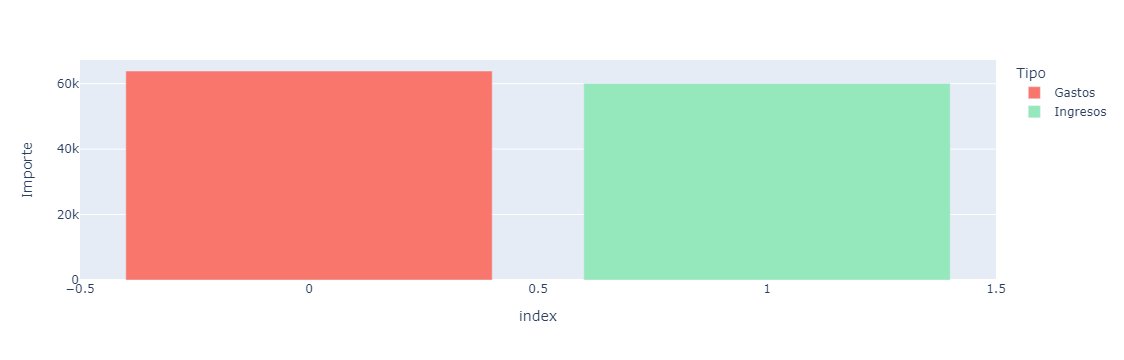

In [40]:
import plotly.express as px
fig = px.bar(df_total, color = "Tipo", y='Importe', color_discrete_map=color_discrete_map)
fig.show()

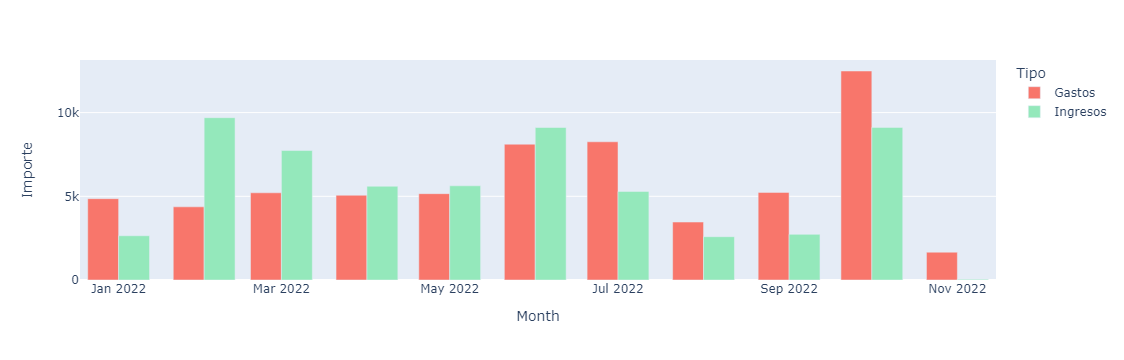

In [41]:
import plotly.express as px
fig = px.bar(df, x = "Month",  y='Importe', color = "Tipo", barmode='group', color_discrete_map=color_discrete_map)
fig.show()

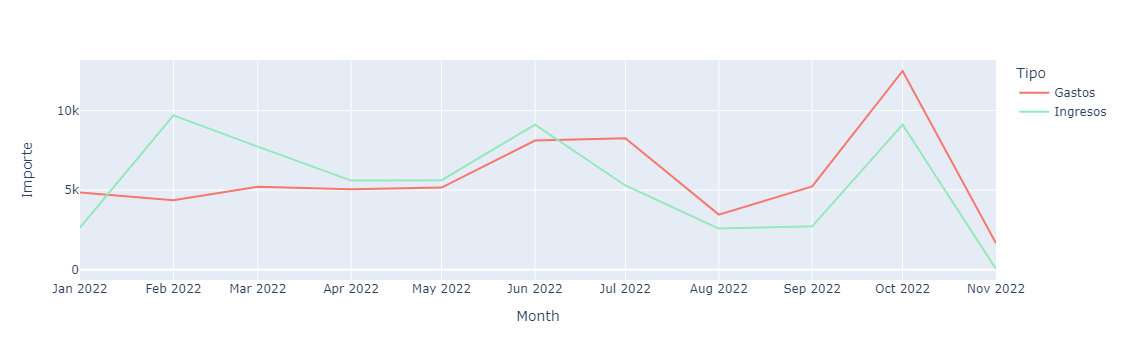

In [42]:
import plotly.express as px
fig = px.line(df, x = "Month",  y='Importe', color = "Tipo", color_discrete_map=color_discrete_map)
fig.show()

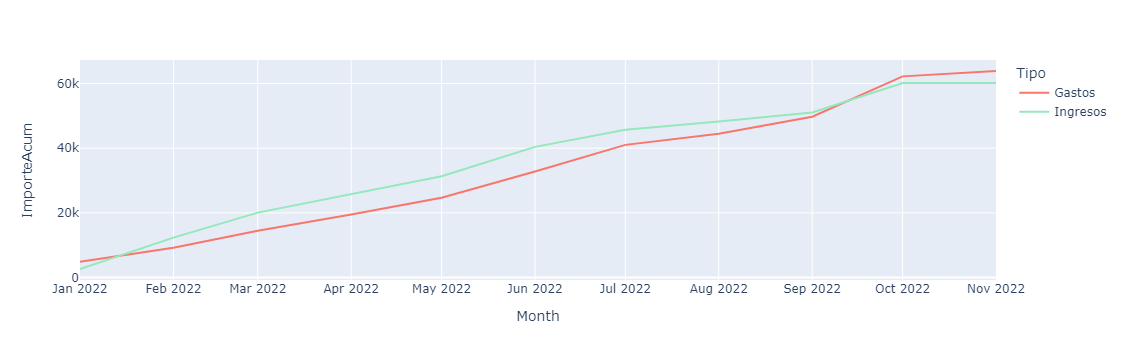

In [43]:
import plotly.express as px
fig = px.line(df, x = "Month",  y='ImporteAcum', color = "Tipo", color_discrete_map=color_discrete_map)
fig.show()